In [2]:
import numpy as np
from astropy.io import ascii
import matplotlib.pylab as plt

In [3]:
keys = ["sp", "ng"]
markers = {"sp": "o", "ng": "s"}
colors = {"sp": "b", "ng": "orange"}

In [34]:
T_psf = 0.166776
#T_psf = 0.17673
#T_psf = 0.219434
#T_psf = 0.230831
#T_psf = 0.292146

sigma_psf = np.sqrt(T_psf / 2)
fwhm_psf = (2 * np.sqrt(2 * np.log(2))) * sigma_psf
fwhm_psf_str = f"{fwhm_psf:.2f}"

print(f"FWHM_PSF = {fwhm_psf_str} arcsec")

dat = ascii.read(f"T_{fwhm_psf_str}.txt", format="commented_header")

FWHM_PSF = 0.68 arcsec


In [35]:
# Compute mean and standard deviation for each flux

T_mean = {}
T_std = {}
SNR_mean = {}

for key in keys:
    T_mean[key] = []
    T_std[key] = []
    SNR_mean[key] = []

fluxes = list(set(dat["Flux"]))
for flux in fluxes:
    idx = np.where(dat["Flux"] == flux)[0]
    
    for key in keys:
        T_mean[key].append(np.mean(dat[f"T_{key}"][idx]))
        T_std[key].append(np.std(dat[f"T_{key}"][idx]))
        SNR_mean[key].append(np.mean(dat[f"SNR_{key}"][idx]))

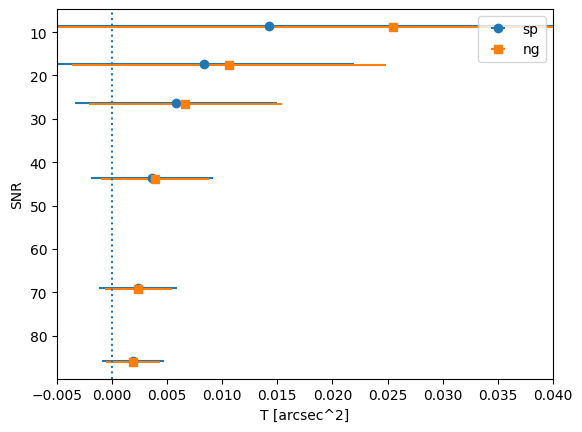

In [36]:
fig, ax = plt.subplots()

for key in keys:
    ax.errorbar(T_mean[key], SNR_mean[key], xerr=T_std[key], fmt=markers[key], label=key)
ax.invert_yaxis()
ax.set_xlabel("T [arcsec^2]")
ax.set_ylabel("SNR")
ax.set_xlim(-0.005, 0.04)
plt.axvline(x=0, linestyle=":")
ax.legend()
plt.savefig(f"T_dT_{fwhm_psf_str}.png")

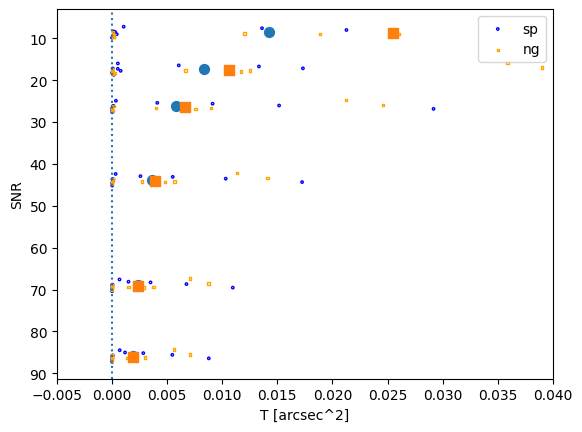

In [37]:
fig, ax = plt.subplots()
for key in keys:
    ax.scatter(dat[f"T_{key}"], dat[f"SNR_{key}"], label=key, marker=markers[key], edgecolors=colors[key], facecolor="none", s=3)
    ax.scatter(T_mean[key], SNR_mean[key], marker=markers[key], s=50)

ax.invert_yaxis()
ax.set_xlabel("T [arcsec^2]")
ax.set_ylabel("SNR")
ax.set_xlim(-0.005, 0.04)
plt.axvline(x=0, linestyle=":")
ax.legend()
plt.savefig(f"T_{fwhm_psf_str}.png")

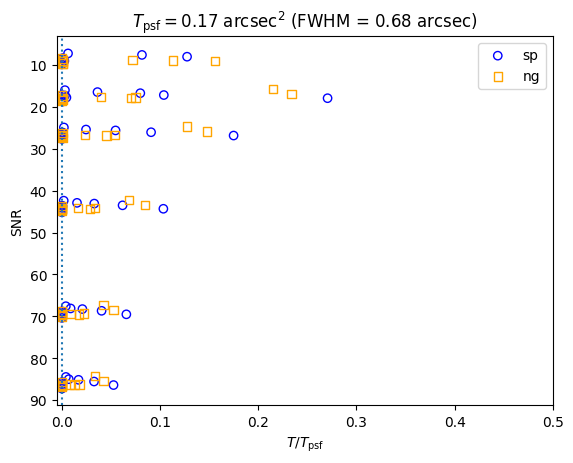

In [38]:
fig, ax = plt.subplots()
for key in keys:
    ax.scatter(dat[f"T_{key}"] / T_psf, dat[f"SNR_{key}"], label=key, marker=markers[key], edgecolors=colors[key], facecolor="none")
ax.invert_yaxis()
ax.set_xlabel("$T/T_{\\rm psf}$")
ax.set_ylabel("SNR")
ax.set_xlim(-0.005, 0.5)
ax.set_title(f"$T_{{\\rm psf}} = {T_psf:.2f}$ arcsec$^2$ (FWHM = ${fwhm_psf_str}$ arcsec)")
plt.axvline(x=0, linestyle=":")
ax.legend()
plt.savefig(f"T_Tpsf_{fwhm_psf_str}.png")